In [1]:
from planet4 import clustering, io, markings, stats, plotting
from pathlib import Path

In [2]:
db = io.DBManager()

In [3]:
obsid = 'ESP_012079_0945'

In [4]:
data = db.get_image_name_markings(obsid)

In [5]:
image_ids = data.image_id.unique()

In [6]:
subdata = data[data.image_id.isin(image_ids[:5])]

In [7]:
subdata.shape

(1243, 21)

In [8]:
from ipyparallel import Client
c = Client()

TimeoutError: Hub connection request timed out

In [8]:
# At the beginning of the notebook
import logging
logger = logging.getLogger()
assert len(logger.handlers) == 1
logger.addHandler(logging.StreamHandler())
handler = logger.handlers[1]
handler.setLevel(logging.DEBUG)

In [9]:
def process_imgid(id_, dynamic=True, angle=True, distance=False, radius=False,
                  data=None, eps=15, normalize=False):
    import matplotlib.pyplot as plt
    from planet4 import plotting, clustering
    from pathlib import Path
    path = io.p4data() / ('pipelinecheck7_eps'+str(eps))
    path.mkdir(exist_ok=True)
    cm = clustering.ClusteringManager(output_dir=path,
                                      do_dynamic_min_samples=dynamic,
                                      include_angle=angle,
                                      include_distance=distance,
                                      include_radius=radius,
                                      eps=eps, normalize=normalize)
    cm.cluster_image_id(id_, data=data)
    plotting.plot_image_id_pipeline(id_, datapath=path, save=True)
#     plt.close('all')
    return cm

In [10]:
def process_img_name(image_name, dynamic=True, angle=True, distance=False, radius=False,
                     data=None, eps=15):
    import matplotlib.pyplot as plt
    from planet4 import plotting, clustering, io
    from pathlib import Path
    path = io.p4data() / ('pipelinecheck7_eps' + str(eps))
    path.mkdir(exist_ok=True)
    cm = clustering.ClusteringManager(output_dir=path,
                                      do_dynamic_min_samples=dynamic,
                                      include_angle=angle,
                                      include_distance=distance,
                                      include_radius=radius,
                                      eps=eps)
    cm.cluster_image_name(image_name, data=data)
#     plotting.plot_image_id_pipeline(id_, datapath=path, save=True)
#     plt.close('all')

In [11]:
%matplotlib inline

In [12]:
image_ids = ['APF0000b89','APF0000bff', 'APF0000ctr', 'APF0000bud','APF0000fwe']


Clustering data for APF0000b89
ClusterManager: cluster_data()
Running DBSCAN
Estimated number of clusters: 8
Reduced data to 8 fan(e)s.
Running DBSCAN
Estimated number of clusters: 1
Reduced data to 1 blotch(e)s.
Clustering completed.


n_classifications: 31
min_samples: 5


Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.


Error while trying to plot finals.


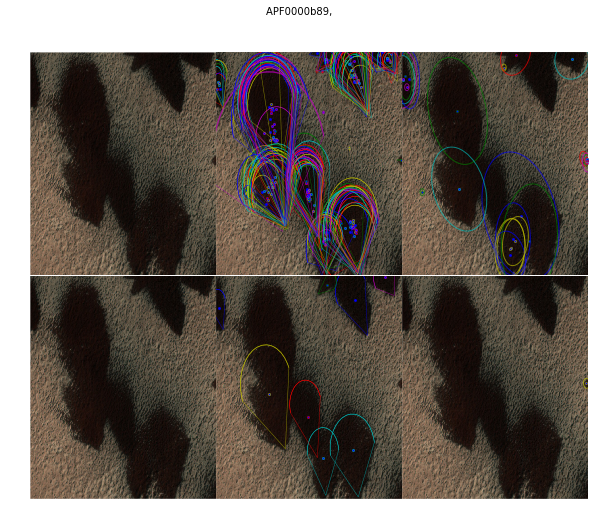

In [14]:
process_imgid(image_ids[0], eps=15, angle=False)

In [13]:
process_img_name(obsid, data=subdata)

n_classifications: 45
min_samples: 7
n_classifications: 72
min_samples: 11
n_classifications: 57
min_samples: 9
n_classifications: 46
min_samples: 7
n_classifications: 72
min_samples: 11


In [21]:
def angle_to_xy(angle):
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    return x,y

In [22]:
angle_to_xy(1)

(0.99984769515639127, 0.017452406437283512)

In [23]:
angle_to_xy(359)

(0.99984769515639127, -0.01745240643728356)

In [27]:
from planet4.dbscan import DBScanner

In [29]:
angles = pd.Series([30, 1, 359])

In [34]:
df = pd.DataFrame({'xang':np.cos(np.deg2rad(angles)),
              'yang':np.sin(np.deg2rad(angles))})

df.values*300

array([[ 259.80762114,  150.        ],
       [ 299.95430855,    5.23572193],
       [ 299.95430855,   -5.23572193]])

In [40]:
dbscanner = DBScanner(df.values*300, eps=15, min_samples=2)

In [41]:
dbscanner.reduced_data

[[1, 2]]

In [42]:
from sklearn.preprocessing import normalize, Normalizer

In [43]:
Normalizer?

In [45]:
normalize(df.values*300)

array([[ 0.8660254 ,  0.5       ],
       [ 0.9998477 ,  0.01745241],
       [ 0.9998477 , -0.01745241]])

In [46]:
df

xang      yang
0  0.866025  0.500000
1  0.999848  0.017452
2  0.999848 -0.017452

In [15]:
from astropy import units as u

In [16]:
wn = 810 / u.cm

In [17]:
wn

<Quantity 810.0 1 / cm>

In [26]:
wn.to(u.nm, equivalencies=u.equivalencies.spectral())

<Quantity 12345.679012345678 nm>

In [30]:
wl = 245.7 * u.nm

In [31]:
wl.to(1/u.cm, equivalencies=u.equivalencies.spectral())

<Quantity 40700.04070004069 1 / cm>

In [32]:
1/245.7e-9

4070004.07000407

APF0000cwl
n_classifications: 45
min_samples: 7
Some files not found.
APF0000csc
n_classifications: 72
min_samples: 11
Clustered blotchfile not found
Some files not found.
APF0000cvx
n_classifications: 57
min_samples: 9
Some files not found.
APF0000cjp
n_classifications: 46
min_samples: 7
Some files not found.
APF0000cjh
n_classifications: 72
min_samples: 11
Some files not found.


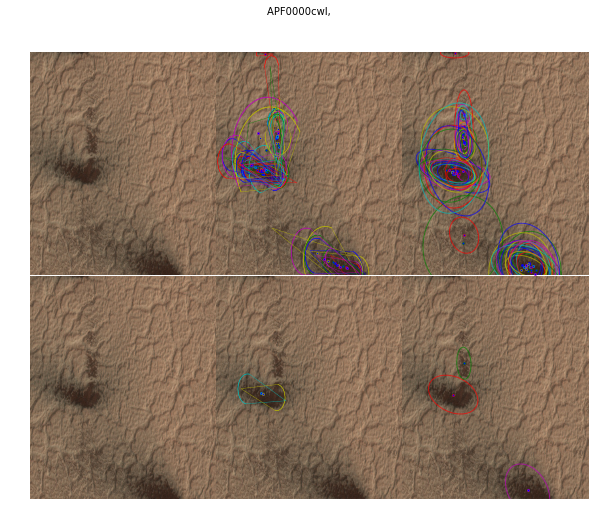

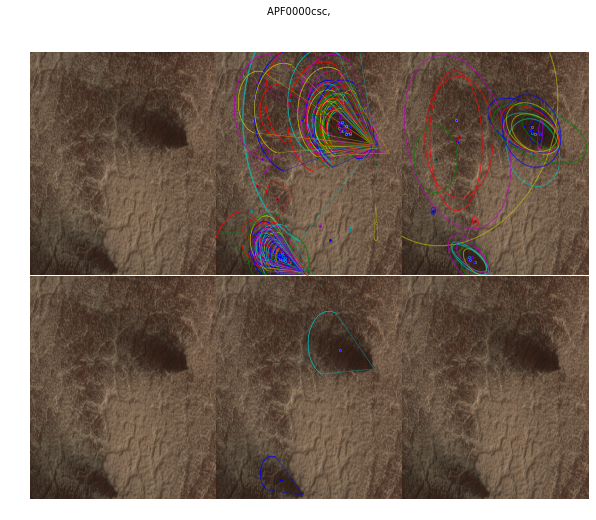

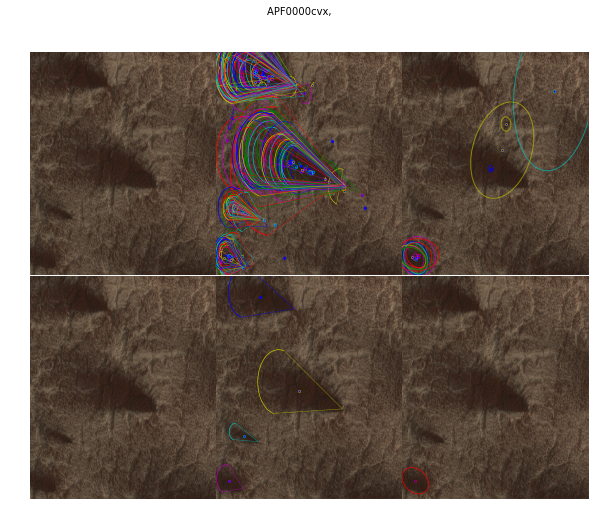

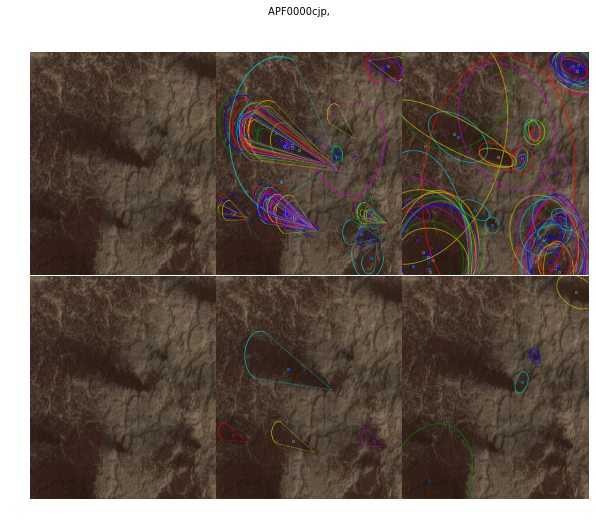

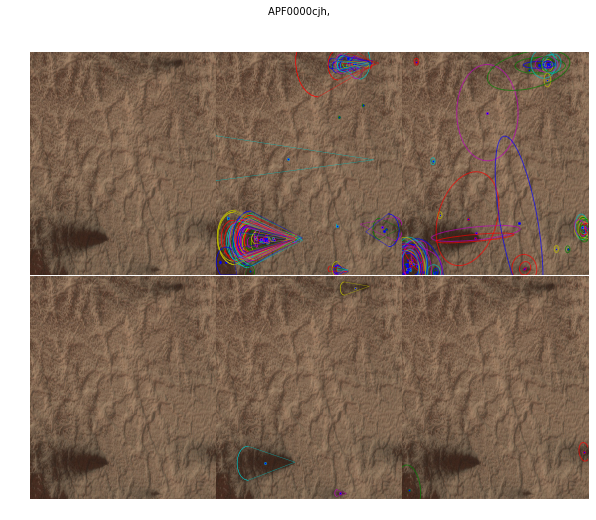

In [40]:
for image_id in image_ids[:5]:
    print(image_id)
    process_imgid(image_id, data=data)

Entering markings.plot_objects
Created own axis.
Plotting background image.
Found image in cache.


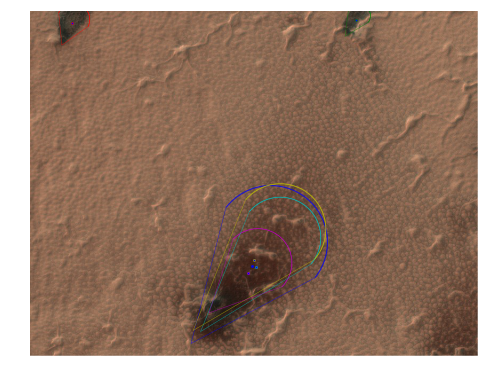

In [6]:
plotting.plot_clustered_fans('1dr')

Entering markings.plot_objects
Created own axis.
Plotting background image.
Found image in cache.


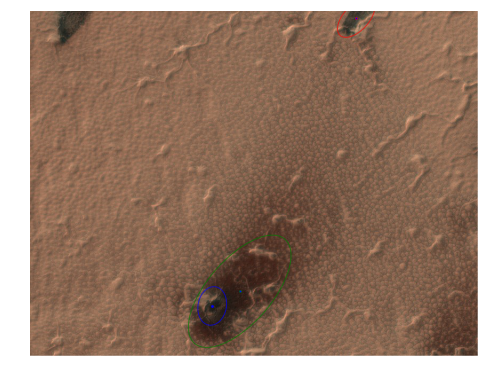

In [7]:
plotting.plot_clustered_blotches('1dr')

Entering markings.plot_objects
Plotting background image.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.


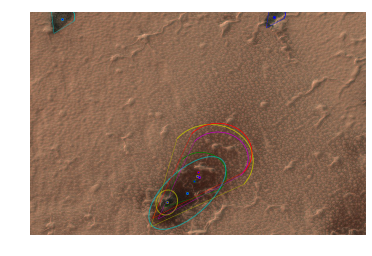

In [8]:
plotting.plot_finals('1dr')

In [9]:
from planet4.plotting import plot_clustered_blotches, plot_clustered_fans, plot_finals

Found image in cache.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.
Entering markings.plot_objects
Plotting background image.
Found image in cache.


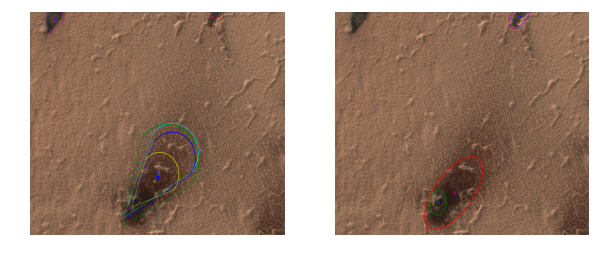

In [10]:
image_id = '1dr'
imgid = markings.ImageID(image_id)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
axes = axes.ravel()
for ax in axes:
    imgid.show_subframe(ax=ax)
plot_clustered_fans(image_id, ax=axes[0])
plot_clustered_blotches(image_id, ax=axes[1])


In [12]:
process_imgid('1dr', dynamic=True, angle=True, distance=True)

Clustering data for APF00001dr
ClusterManager: cluster_data()
Running DBSCAN
Estimated number of clusters: 1
Reduced data to 1 fan(e)s.
Running DBSCAN
Estimated number of clusters: 0
Reduced data to 0 blotch(e)s.
Clustering and fnotching completed.
CM: Writing output files.
CM: Output dir: /Users/klay6683/data/planet4/pipelinecheck5
Executing apply_fnotch_cut
Executing get_newfans_newblotches
Apply fnotch cut: No new blotches found.
Finished apply_fnotch_cut.


n_classifications: 82
min_samples: 8


'1dr'

In [ ]:
p1 = (221.79, 508.936)
p2 = (232, 517)

In [ ]:
from scipy.linalg import norm

In [ ]:
dp = np.array(p1) - np.array(p2)

In [ ]:
dp

In [ ]:
norm(dp)

In [ ]:
recheck_ids = ['1dn','1k3','1e4','1fe','1aa','225','1pr','19g']
for imid in recheck_ids:
    print(imid)
    cm.cluster_image_id(imid)
    plotting.plot_image_id_pipeline(imid, datapath=path, save=True)

In [ ]:
db = io.DBManager()
data = db.get_image_id_markings('1fe')

In [ ]:
data.classification_id.nunique()

In [ ]:
plotting.plot_finals(imid, _dir=path)

In [ ]:
plotting.plot_raw_blotches(imid)

In [ ]:
from planet4.plotting import blotches_all, fans_all

In [ ]:
import seaborn as sns
sns.set_context('notebook')
blotches_all(imid)

In [ ]:
fans_all(imid)

In [ ]:
lbview = c.load_balanced_view()

In [ ]:
import nbtools.multiprocessing as mptools

In [ ]:
results = lbview.map_async(process_imgid, ids)

In [ ]:
mptools.nb_progress_display(results, ids)